In [1]:
import yfinance as yf
import pandas as pd
import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

BancoSantanderSA = yf.Ticker("SAN")
print("El precio de compra es: ", BancoSantanderSA.info['ask']) #Precio de compra acción
print("El precio de venta es: ", BancoSantanderSA.info['bid']) #Precio de venta acción

Telefonica = yf.Ticker ("TEF")
print ("El precio de compra es: ",Telefonica.info['ask'])
print ("El precio de venta es: ",Telefonica. info['bid'])

Repsol = yf.Ticker ("REP.MC")
print ("El precio de compra es: ", Repsol.info['ask'])
print ("El precio de venta es: ",Repsol. info['bid'])

BancoBBVA = yf.Ticker ("BBVA")

print ("El precio de compra es: ", BancoBBVA.info['ask'])
print ("El precio de venta es: ", BancoBBVA. info['bid'])


El precio de compra es:  3.77
El precio de venta es:  3.76
El precio de compra es:  4.36
El precio de venta es:  4.38
El precio de compra es:  10.834
El precio de venta es:  10.828
El precio de compra es:  6.91
El precio de venta es:  6.8


In [2]:
dfSAN = yf.download('SAN', period="1d") #Obtengo datos de Yahoo para cada acción
dfSAN.reset_index(inplace=True,drop=False) #Me permite transformar a Date en columna al igual que las demas

dfTEF = yf.download('TEF',  period="1d")
dfTEF.reset_index(inplace=True,drop=False)

dfREPMC = yf.download('REP.MC', period="1d")
dfREPMC.reset_index(inplace=True,drop=False)

dfBBVA = yf.download('BBVA', period="1d")
dfBBVA.reset_index(inplace=True,drop=False)


print(dfSAN)
print(dfTEF)
print(dfREPMC)
print(dfBBVA)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open    High   Low  Close  Adj Close   Volume
0 2021-11-05  3.81  3.8175  3.76   3.78       3.78  3166158
        Date  Open  High   Low  Close  Adj Close   Volume
0 2021-11-05  4.32  4.39  4.32   4.36       4.36  1659873
        Date   Open    High     Low   Close  Adj Close   Volume
0 2021-11-05  10.71  10.878  10.584  10.812     10.812  8242619
        Date  Open  High   Low  Close  Adj Close  Volume
0 2021-11-05  6.97   7.0  6.88   6.93       6.93  849549


In [3]:
varSAN = list(dfSAN.Open - dfSAN.Close) # Creo variables en donde almaceno una lista con la diferencia entre
varTEF = list(dfTEF.Open - dfTEF.Close) # los valores de la columna Open y Close
varREP = list(dfREPMC.Open - dfREPMC.Close)
varBBVA = list(dfBBVA.Open - dfBBVA.Close)
fecha = list(dfSAN.Date)

print(varSAN)
print(varTEF)
print(varREP)
print(varBBVA)
print(fecha)



[0.029999971389770508]
[-0.039999961853027344]
[-0.10200023651123047]
[0.039999961853027344]
[Timestamp('2021-11-05 00:00:00')]


In [4]:
data = {'Fecha': fecha,             #Creo un diccionario con las variables que cree asi despues formo el dataframe
    'Variacion Santander': varSAN,
    'Variacion Telefonica': varTEF,
    'Variacion Repsol': varREP,
    'Variacion BBVA': varBBVA,}


df = pd.DataFrame(data) #Creo el data frame tomando como parametro el diccionario anterior
print(df)

df.to_csv('Bolsayahoo.csv') #Creo el archivo CSV



       Fecha  Variacion Santander  Variacion Telefonica  Variacion Repsol  \
0 2021-11-05                 0.03                 -0.04            -0.102   

   Variacion BBVA  
0            0.04  


In [5]:
df = pd.read_csv('Bolsayahoo.csv')
cabecera = np.array(df.columns[2:]) #obtengo la cabacera (listado de columnas), desde la primera accion de interes o sea la tercera columna 
print('Cabeceras: ', cabecera)

Cabeceras:  ['Variacion Santander' 'Variacion Telefonica' 'Variacion Repsol'
 'Variacion BBVA']


In [6]:
for i in df.index: #Saco los valores Maximos y Minimos correspondientes a cada dia
    acciones = np.array(df.iloc[i][2:])
    #print(acciones)
    vmax=acciones.max()
    vmin=acciones.min()
    accmax=cabecera[np.where(acciones==vmax)]
    accmin=cabecera[np.where(acciones==vmin)]
    print("En la fecha "+ str(df["Fecha"][i])+ " la mayor variacion fue ",round(vmax,2), "para ",accmax[0])
    print("En la fecha "+ str(df["Fecha"][i])+ " la menor variacion fue ",round(vmin,2), "para ",accmin[0])

En la fecha 2021-11-05 la mayor variacion fue  0.04 para  Variacion BBVA
En la fecha 2021-11-05 la menor variacion fue  -0.1 para  Variacion Repsol


In [7]:
#Gráfico 4 Acciones en los ultimos 5 días.
def grafaccionyahoo(ticker,period,name):
    ticker = yf.Ticker(ticker)
    aapl_df = ticker.history(period=period)
    aapl_df['Close'].plot(title=f"{name} variación precio")
    plt.savefig(f'{name}Yahoo.png')

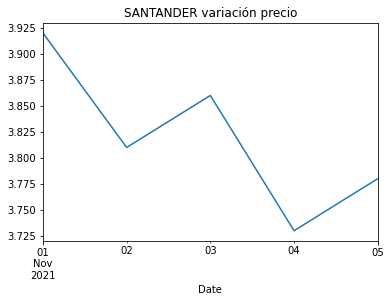

In [8]:
grafaccionyahoo('SAN','5d','SANTANDER') #Variacion Santander últimos 5 dias.


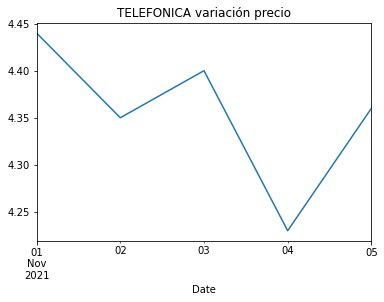

In [9]:
grafaccionyahoo('TEF','5d','TELEFONICA') #Variacion Telefonica últimos 5 dias.

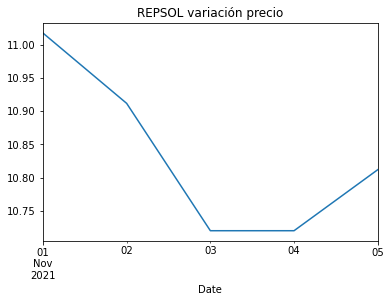

In [10]:
grafaccionyahoo('REP.MC','5d','REPSOL') #Variacion Telefonica últimos 5 dias.

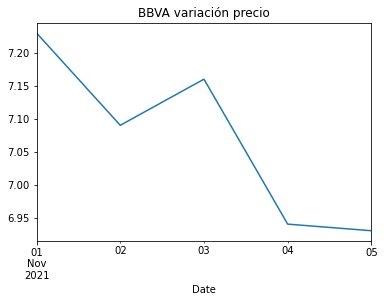

In [11]:
grafaccionyahoo('BBVA','5d','BBVA') #Variacion BBVA últimos 5 dias.

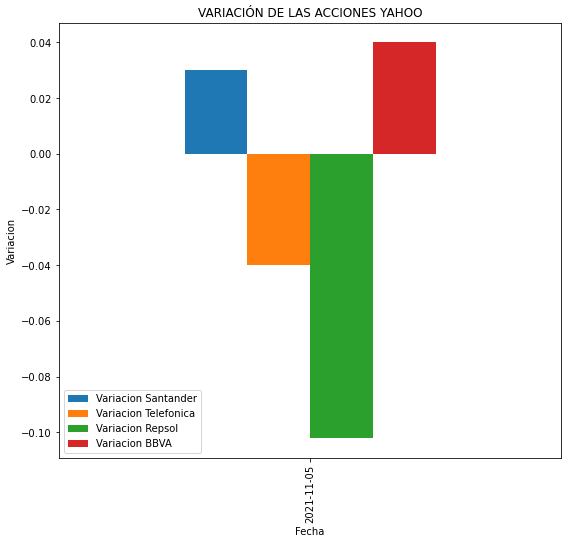

In [12]:
# Variaciones del dia de las 4 acciones. Diferencia entre valor de apertura y cierre de la accion.
df.plot(x="Fecha", y=["Variacion Santander", "Variacion Telefonica", "Variacion Repsol", 'Variacion BBVA'], kind="bar",figsize=(9,8))
plt.ylabel('Variacion')
plt.xlabel('Fecha')
plt.title('VARIACIÓN DE LAS ACCIONES YAHOO')
plt.show()